In [701]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20,10)

In [702]:
df1 = pd.read_csv("./DataSet_SecondaryData/Chennai Housing Sales Price.csv",encoding='cp1252')
df1.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [703]:
df1.shape

(7109, 22)

In [704]:
df1.groupby('AREA')['AREA'].agg('count')

AREA
Adyar          773
Adyr             1
Ana Nagar        3
Ann Nagar        2
Anna Nagar     783
Chormpet         6
Chrmpet          6
Chrompet      1681
Chrompt          9
KK Nagar       996
KKNagar          1
Karapakam        3
Karapakkam    1363
T Nagar        496
TNagar           5
Velachery      979
Velchery         2
Name: AREA, dtype: int64

In [705]:
df1['AREA'][df1['AREA'] == "Velchery"] = "Velachery"
conditions = (df1['AREA'] == "Chrompt") | (df1['AREA'] == "Chrmpet") | (df1['AREA'] == "Chormpet")
df1.loc[conditions, 'AREA'] = "Chrompet"
df1['AREA'][df1['AREA'] ==  "TNagar"] = "T Nagar"
df1['AREA'][df1['AREA'] ==  "KKNagar"] = "KK Nagar"
df1['AREA'][df1['AREA'] ==  "Karapakam"] = "Karapakkam"
conditions = (df1['AREA'] == "Ann Nagar") | (df1['AREA'] == "Ana Nagar")
df1.loc[conditions, 'AREA'] = "Anna Nagar"
df1['AREA'][df1['AREA'] == "Adyr"] = "Adyar"

C:\Users\Solom\AppData\Local\Temp\ipykernel_12824\3918913615.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['AREA'][df1['AREA'] == "Velchery"] = "Velachery"
C:\Users\Solom\AppData\Local\Temp\ipykernel_12824\3918913615.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['AREA'][df1['AREA'] ==  "TNagar"] = "T Nagar"
C:\Users\Solom\AppData\Local\Temp\ipykernel_12824\3918913615.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

In [706]:
df1.groupby('AREA')['AREA'].agg('count')

AREA
Adyar          774
Anna Nagar     788
Chrompet      1702
KK Nagar       997
Karapakkam    1366
T Nagar        501
Velachery      981
Name: AREA, dtype: int64

In [707]:
df1.dtypes

PRT_ID            object
AREA              object
INT_SQFT           int64
DATE_SALE         object
DIST_MAINROAD      int64
N_BEDROOM        float64
N_BATHROOM       float64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
DATE_BUILD        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
REG_FEE            int64
COMMIS             int64
SALES_PRICE        int64
dtype: object

<Axes: >

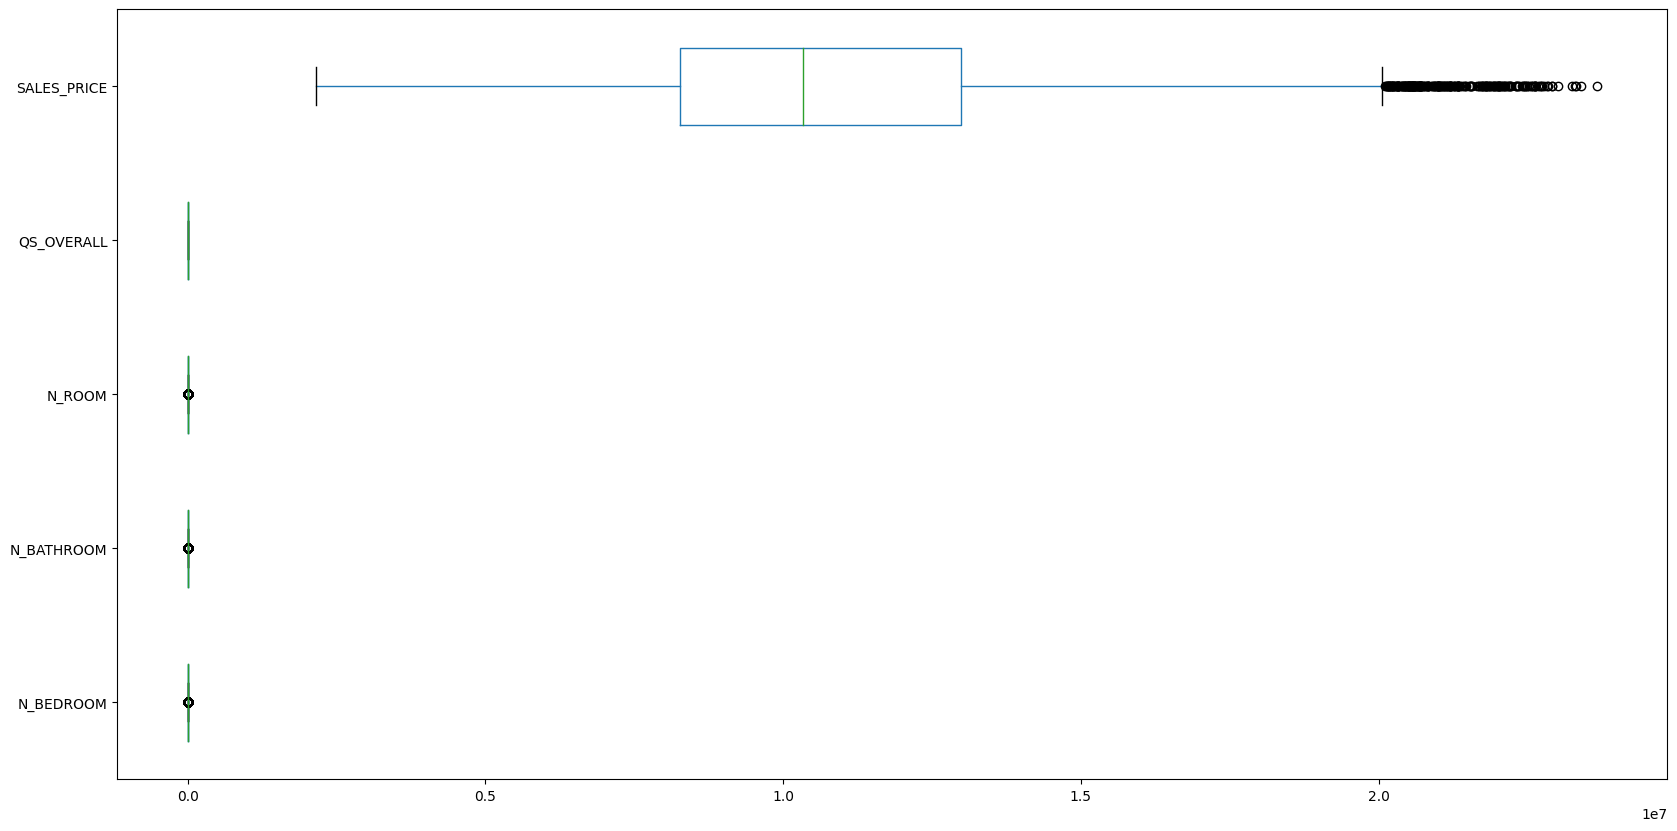

In [708]:
columns_to_plot = ['N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'QS_OVERALL', 'SALES_PRICE']
df1.boxplot(column=columns_to_plot, vert=False, grid=False)

<Axes: >

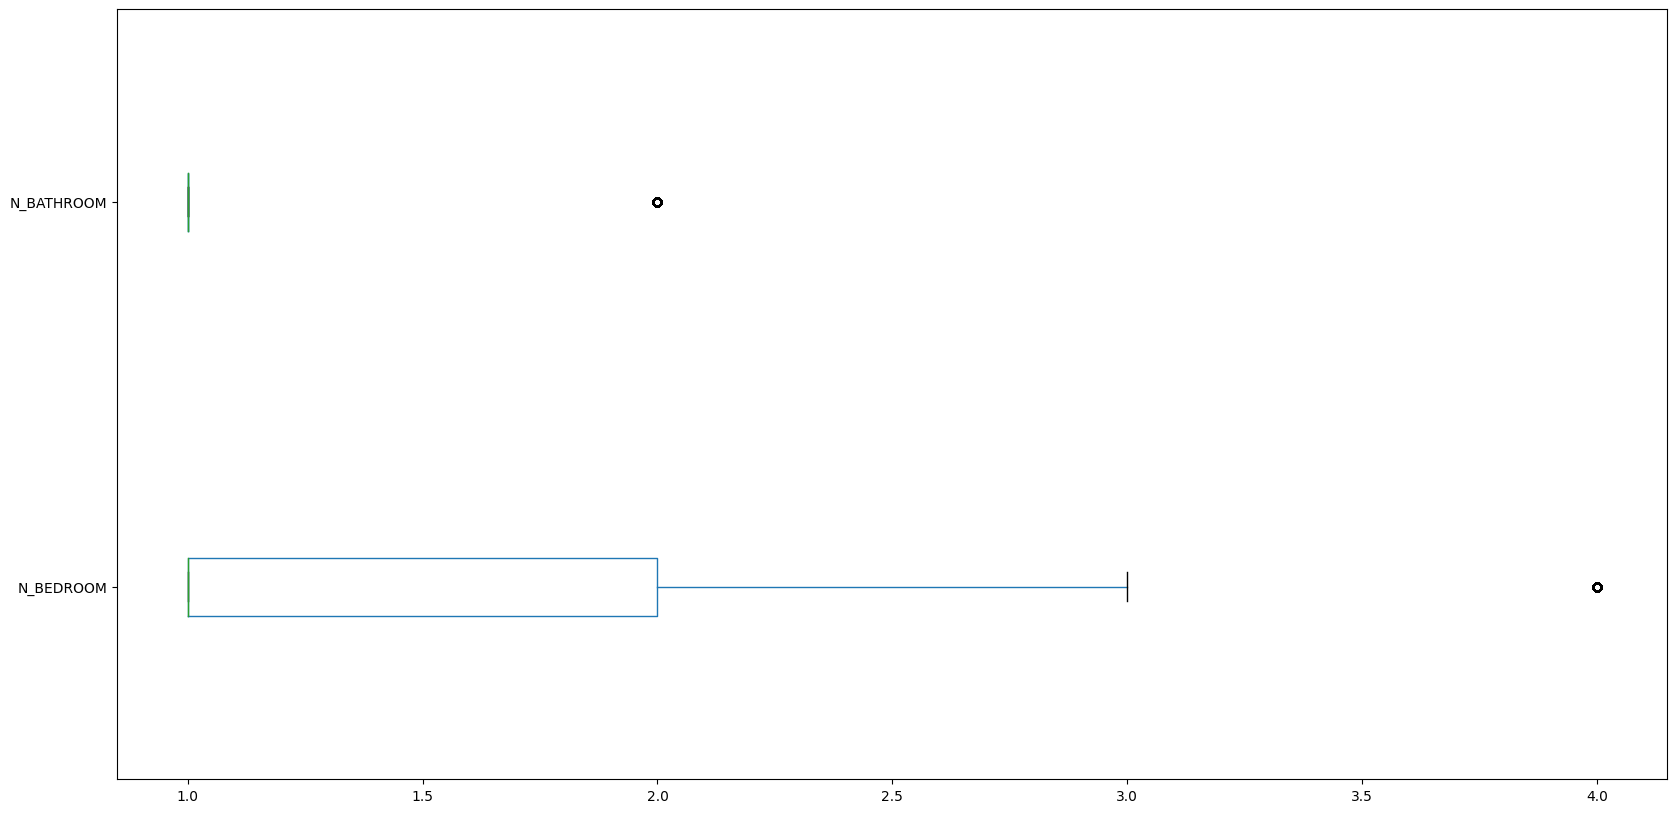

In [709]:
columns_to_plot = ['N_BEDROOM', 'N_BATHROOM']
df1.boxplot(column=columns_to_plot, vert=False, grid=False)

In [710]:
def remove_outliers(x, outlier_threshold=1.5):
    Q1 = np.percentile(x, 25)
    Q3 = np.percentile(x, 75)
    IQR_val = Q3 - Q1
    lower_bound = Q1 - outlier_threshold * IQR_val
    upper_bound = Q3 + outlier_threshold * IQR_val
    
    x[(x < lower_bound) | (x > upper_bound)] = np.nan
    return x

In [711]:
df2=df1.copy()
df2.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [712]:
missing_values = df2.isnull().sum()
print(missing_values)

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64


In [713]:
df2.dropna(inplace=True)

In [714]:
missing_values = df2.isnull().sum()
print(missing_values)

PRT_ID           0
AREA             0
INT_SQFT         0
DATE_SALE        0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
DATE_BUILD       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
REG_FEE          0
COMMIS           0
SALES_PRICE      0
dtype: int64


In [715]:
df2['DATE_SALE'] = pd.to_datetime(df2['DATE_SALE'], format='%d-%m-%Y')

In [716]:
categorical_cols = ['AREA', 'SALE_COND', 'PARK_FACIL', 'UTILITY_AVAIL', 'STREET', 'MZZONE']
df2[categorical_cols] = df2[categorical_cols].astype('category')

In [717]:
numeric_cols = ['N_BEDROOM', 'N_BATHROOM']
for col in numeric_cols:
    df2[col] = remove_outliers(df2[col])

C:\Users\Solom\AppData\Local\Temp\ipykernel_12824\4121322437.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[(x < lower_bound) | (x > upper_bound)] = np.nan


In [718]:
df2.reset_index(drop=True, inplace=True)

In [719]:
df2.shape

(7056, 22)

In [720]:
missing_values = df2.isnull().sum()
print(missing_values)

PRT_ID              0
AREA                0
INT_SQFT            0
DATE_SALE           0
DIST_MAINROAD       0
N_BEDROOM         253
N_BATHROOM       1504
N_ROOM              0
SALE_COND           0
PARK_FACIL          0
DATE_BUILD          0
BUILDTYPE           0
UTILITY_AVAIL       0
STREET              0
MZZONE              0
QS_ROOMS            0
QS_BATHROOM         0
QS_BEDROOM          0
QS_OVERALL          0
REG_FEE             0
COMMIS              0
SALES_PRICE         0
dtype: int64


In [721]:
df2.dropna(inplace=True)
df2.reset_index(drop=True, inplace=True)
missing_values = df2.isnull().sum()
print(missing_values)
df2.shape

PRT_ID           0
AREA             0
INT_SQFT         0
DATE_SALE        0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
DATE_BUILD       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
REG_FEE          0
COMMIS           0
SALES_PRICE      0
dtype: int64


(5552, 22)

<Axes: >

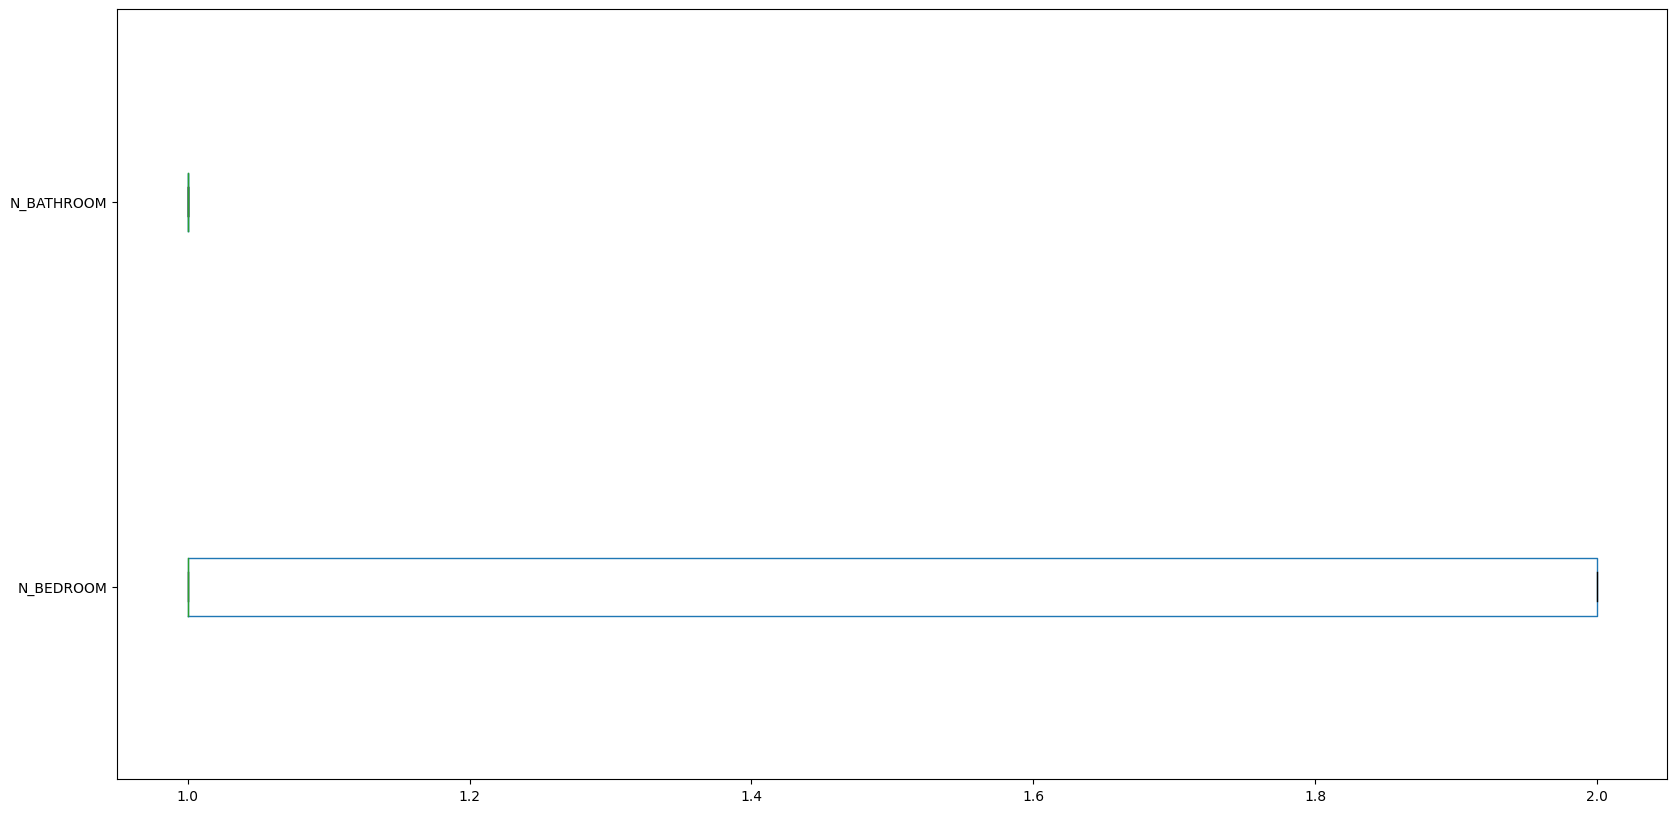

In [722]:
columns_to_plot = ['N_BEDROOM', 'N_BATHROOM']
df2.boxplot(column=columns_to_plot, vert=False, grid=False)

In [723]:
df3 = df2[['AREA', 'INT_SQFT', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL',
           'SALE_COND','PARK_FACIL','BUILDTYPE','UTILITY_AVAIL','STREET',
           'REG_FEE','COMMIS', 'SALES_PRICE']]

In [724]:
df3.head()

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,REG_FEE,COMMIS,SALES_PRICE
0,Karapakkam,1004,1.0,1.0,3,4.0,3.9,4.9,4.330,AbNormal,Yes,Commercial,AllPub,Paved,380000,144400,7600000
1,Anna Nagar,1986,2.0,1.0,5,4.9,4.2,2.5,3.765,AbNormal,No,Commercial,AllPub,Gravel,760122,304049,21717770
2,Adyar,909,1.0,1.0,3,4.1,3.8,2.2,3.090,AbNormal,Yes,Commercial,ELO,Gravel,421094,92114,13159200
3,Karapakkam,1226,1.0,1.0,3,3.0,2.5,4.1,3.290,AbNormal,Yes,Others,AllPub,Gravel,237000,74063,7406250
4,Chrompet,1220,2.0,1.0,4,4.5,2.6,3.1,3.320,Partial,No,Commercial,NoSeWa,No Access,409027,198316,12394750


In [725]:
unique_sale_cond = df3['SALE_COND'].unique()
unique_park_facil = df3['PARK_FACIL'].unique()
unique_build_type = df3['BUILDTYPE'].unique()
unique_utility_avail = df3['UTILITY_AVAIL'].unique()
unique_street = df3['STREET'].unique()

print("Unique values in SALE_COND column:", unique_sale_cond)
print("Unique values in PARK_FACIL column:", unique_park_facil)
print("Unique values in BUILDTYPE column:", unique_build_type)
print("Unique values in UTILITY_AVAIL column:", unique_utility_avail)
print("Unique values in STREET column:", unique_street)


Unique values in SALE_COND column: ['AbNormal', 'Partial', 'AdjLand', 'Family', 'Normal Sale', 'Partiall', 'Adj Land', 'Ab Normal', 'PartiaLl']
Categories (9, object): ['Ab Normal', 'AbNormal', 'Adj Land', 'AdjLand', ..., 'Normal Sale', 'PartiaLl', 'Partial', 'Partiall']
Unique values in PARK_FACIL column: ['Yes', 'No', 'Noo']
Categories (3, object): ['No', 'Noo', 'Yes']
Unique values in BUILDTYPE column: ['Commercial' 'Others' 'Other' 'House' 'Comercial']
Unique values in UTILITY_AVAIL column: ['AllPub', 'ELO', 'NoSeWa', 'NoSewr ', 'All Pub']
Categories (5, object): ['All Pub', 'AllPub', 'ELO', 'NoSeWa', 'NoSewr ']
Unique values in STREET column: ['Paved', 'Gravel', 'No Access', 'Pavd', 'NoAccess']
Categories (5, object): ['Gravel', 'No Access', 'NoAccess', 'Pavd', 'Paved']


In [726]:
# Define a mapping dictionary for each column
sale_cond_mapping = {
    'AbNormal': 1,
    'Partial': 2,
    'AdjLand': 3,
    'Family': 4,
    'Normal Sale': 5,
    'Partiall': 2,
    'Adj Land': 3,
    'Ab Normal': 1,
    'PartiaLl': 2
}

park_facil_mapping = {
    'Yes': 1,
    'No': 2,
    'Noo': 2
}

build_type_mapping = {
    'Commercial': 1,
    'Others': 2,
    'Other': 2,
    'House': 3,
    'Comercial': 1
}

utility_avail_mapping = {
    'AllPub': 1,
    'ELO': 2,
    'NoSeWa': 3,
    'NoSewr ': 3,
    'All Pub': 1
}

street_mapping = {
    'Paved': 1,
    'Gravel': 2,
    'No Access': 3,
    'Pavd': 1,
    'NoAccess': 3
}

# Apply the mapping using .loc accessor
df3.loc[:, 'SALE_COND'] = df3['SALE_COND'].map(sale_cond_mapping).astype(float)
df3.loc[:, 'PARK_FACIL'] = df3['PARK_FACIL'].map(park_facil_mapping).astype(float)
df3.loc[:, 'BUILDTYPE'] = df3['BUILDTYPE'].map(build_type_mapping).astype(float)
df3.loc[:, 'UTILITY_AVAIL'] = df3['UTILITY_AVAIL'].map(utility_avail_mapping).astype(float)
df3.loc[:, 'STREET'] = df3['STREET'].map(street_mapping).astype(float)

df3['BUILDTYPE'] = df3['BUILDTYPE'].astype(float)
df3.head()

C:\Users\Solom\AppData\Local\Temp\ipykernel_12824\1768242636.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['BUILDTYPE'] = df3['BUILDTYPE'].astype(float)


,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,REG_FEE,COMMIS,SALES_PRICE
0,Karapakkam,1004,1.0,1.0,3,4.0,3.9,4.9,4.330,1.0,1.0,1.0,1.0,1.0,380000,144400,7600000
1,Anna Nagar,1986,2.0,1.0,5,4.9,4.2,2.5,3.765,1.0,2.0,1.0,1.0,2.0,760122,304049,21717770
2,Adyar,909,1.0,1.0,3,4.1,3.8,2.2,3.090,1.0,1.0,1.0,2.0,2.0,421094,92114,13159200
3,Karapakkam,1226,1.0,1.0,3,3.0,2.5,4.1,3.290,1.0,1.0,2.0,1.0,2.0,237000,74063,7406250
4,Chrompet,1220,2.0,1.0,4,4.5,2.6,3.1,3.320,2.0,2.0,1.0,3.0,3.0,409027,198316,12394750


In [727]:
unique_sale_cond = df3['SALE_COND'].unique()
unique_park_facil = df3['PARK_FACIL'].unique()
unique_build_type = df3['BUILDTYPE'].unique()
unique_utility_avail = df3['UTILITY_AVAIL'].unique()
unique_street = df3['STREET'].unique()

print("Unique values in SALE_COND column:", unique_sale_cond)
print("Unique values in PARK_FACIL column:", unique_park_facil)
print("Unique values in BUILDTYPE column:", unique_build_type)
print("Unique values in UTILITY_AVAIL column:", unique_utility_avail)
print("Unique values in STREET column:", unique_street)


Unique values in SALE_COND column: [1. 2. 3. 4. 5.]
Unique values in PARK_FACIL column: [1. 2.]
Unique values in BUILDTYPE column: [1. 2. 3.]
Unique values in UTILITY_AVAIL column: [1. 2. 3.]
Unique values in STREET column: [1. 2. 3.]


In [728]:
df3.dtypes

AREA             category
INT_SQFT            int64
N_BEDROOM         float64
N_BATHROOM        float64
N_ROOM              int64
QS_ROOMS          float64
QS_BATHROOM       float64
QS_BEDROOM        float64
QS_OVERALL        float64
SALE_COND         float64
PARK_FACIL        float64
BUILDTYPE         float64
UTILITY_AVAIL     float64
STREET            float64
REG_FEE             int64
COMMIS              int64
SALES_PRICE         int64
dtype: object

In [729]:
df_encoded = pd.get_dummies(df3, columns=['AREA'], drop_first=True)
df_encoded.head()

,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALE_COND,PARK_FACIL,...,STREET,REG_FEE,COMMIS,SALES_PRICE,AREA_Anna Nagar,AREA_Chrompet,AREA_KK Nagar,AREA_Karapakkam,AREA_T Nagar,AREA_Velachery
0,1004,1.0,1.0,3,4.0,3.9,4.9,4.330,1.0,1.0,...,1.0,380000,144400,7600000,False,False,False,True,False,False
1,1986,2.0,1.0,5,4.9,4.2,2.5,3.765,1.0,2.0,...,2.0,760122,304049,21717770,True,False,False,False,False,False
2,909,1.0,1.0,3,4.1,3.8,2.2,3.090,1.0,1.0,...,2.0,421094,92114,13159200,False,False,False,False,False,False
3,1226,1.0,1.0,3,3.0,2.5,4.1,3.290,1.0,1.0,...,2.0,237000,74063,7406250,False,False,False,True,False,False
4,1220,2.0,1.0,4,4.5,2.6,3.1,3.320,2.0,2.0,...,3.0,409027,198316,12394750,False,True,False,False,False,False


In [739]:
import pandas as pd
pd.set_option('display.max_columns', None)
df_encoded.head()

,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,REG_FEE,COMMIS,SALES_PRICE,AREA_Anna Nagar,AREA_Chrompet,AREA_KK Nagar,AREA_Karapakkam,AREA_T Nagar,AREA_Velachery
0,1004,1.0,1.0,3,4.0,3.9,4.9,4.330,1.0,1.0,1.0,1.0,1.0,380000,144400,7600000,False,False,False,True,False,False
1,1986,2.0,1.0,5,4.9,4.2,2.5,3.765,1.0,2.0,1.0,1.0,2.0,760122,304049,21717770,True,False,False,False,False,False
2,909,1.0,1.0,3,4.1,3.8,2.2,3.090,1.0,1.0,1.0,2.0,2.0,421094,92114,13159200,False,False,False,False,False,False
3,1226,1.0,1.0,3,3.0,2.5,4.1,3.290,1.0,1.0,2.0,1.0,2.0,237000,74063,7406250,False,False,False,True,False,False
4,1220,2.0,1.0,4,4.5,2.6,3.1,3.320,2.0,2.0,1.0,3.0,3.0,409027,198316,12394750,False,True,False,False,False,False


In [730]:
X = df_encoded.drop('SALES_PRICE', axis=1)
y = df_encoded['SALES_PRICE']

In [731]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [740]:
X_train.head()

,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,REG_FEE,COMMIS,AREA_Anna Nagar,AREA_Chrompet,AREA_KK Nagar,AREA_Karapakkam,AREA_T Nagar,AREA_Velachery
1122,742,1.0,1.0,2,4.6,5.0,2.9,4.250,4.0,1.0,3.0,3.0,3.0,238070,126475,False,True,False,False,False,False
4418,745,1.0,1.0,2,2.9,3.8,2.1,3.020,3.0,1.0,1.0,3.0,2.0,275846,137923,False,True,False,False,False,False
840,1637,2.0,1.0,4,3.6,4.7,4.4,4.340,1.0,1.0,2.0,1.0,1.0,279459,162266,False,False,False,False,False,True
3624,1268,2.0,1.0,4,2.5,3.9,3.6,3.390,5.0,2.0,1.0,2.0,3.0,408295,65854,False,True,False,False,False,False
949,1720,1.0,1.0,4,3.9,3.6,2.3,3.105,4.0,2.0,3.0,3.0,1.0,388983,125848,False,False,False,False,True,False


In [733]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.9358566537115092

In [734]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.93923692, 0.93652143, 0.92823543, 0.93949622, 0.9369708 ])

In [735]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

C:\Users\Solom\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Solom\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Solom\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\Solom\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 637, in _validate_params
    validat

,model,best_score,best_params
0,linear_regression,0.936092,{}
1,lasso,0.936092,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.936179,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


Sale Condition (SALE_COND):

'AbNormal': 1
'Partial': 2
'AdjLand': 3
'Family': 4
'Normal Sale': 5
Parking Facility (PARK_FACIL):

'Yes': 1
'No': 2
Building Type (BUILDTYPE):

'Commercial': 1
'Others' / 'Other': 2
'House': 3
Utility Availability (UTILITY_AVAIL):

'AllPub' / 'All Pub': 1
'ELO': 2
'NoSeWa': 3
'NoSewr ': 3
Street Type (STREET):

'Paved' / 'Pavd': 1
'Gravel': 2
'No Access' / 'NoAccess': 3

In [741]:
import pandas as pd

# Load the trained model

# Create a new DataFrame for prediction
new_data = {
    'INT_SQFT': [1004, 1986, 909, 1226, 1220],
    'N_BEDROOM': [1.0, 2.0, 1.0, 1.0, 2.0],
    'N_BATHROOM': [1.0, 1.0, 1.0, 1.0, 1.0],
    'N_ROOM': [3, 5, 3, 3, 4],
    'QS_ROOMS': [4.0, 4.9, 4.1, 3.0, 4.5],
    'QS_BATHROOM': [3.9, 4.2, 3.8, 2.5, 2.6],
    'QS_BEDROOM': [4.9, 2.5, 2.2, 4.1, 3.1],
    'QS_OVERALL': [4.33, 3.765, 3.09, 3.29, 3.32],
    'SALE_COND': [1.0, 1.0, 1.0, 2.0, 1.0],  
    'PARK_FACIL': [1.0, 2.0, 1.0, 1.0, 2.0],  
    'BUILDTYPE': [1.0, 2.0, 1.0, 2.0, 1.0],  
    'UTILITY_AVAIL': [1.0, 1.0, 2.0, 1.0, 3.0],  
    'STREET': [1.0, 2.0, 2.0, 2.0, 3.0],  
    'REG_FEE': [380000, 760122, 421094, 237000, 409027],
    'COMMIS': [144400, 304049, 92114, 74063, 198316],
    'AREA_Anna Nagar': [0, 1, 0, 0, 0],
    'AREA_Chrompet': [0, 0, 0, 0, 1],
    'AREA_KK Nagar': [0, 0, 0, 0, 0],
    'AREA_Karapakkam': [1, 0, 0, 1, 0],
    'AREA_T Nagar': [0, 0, 0, 0, 0],
    'AREA_Velachery': [0, 0, 0, 0, 0]
}


# Create the new DataFrame
new_data_df = pd.DataFrame(new_data)

# Make predictions using the existing trained model
predicted_prices = model.predict(new_data_df)

# Print the predicted prices
for i, price in enumerate(predicted_prices):
    print(f"Predicted Price for Property {i + 1}: {price:.2f}")


Predicted Price for Property 1: 10042154.45
Predicted Price for Property 2: 19903127.56
Predicted Price for Property 3: 11725888.86
Predicted Price for Property 4: 7007740.89
Predicted Price for Property 5: 13382088.66


In [737]:
df_encoded.head()

,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALE_COND,PARK_FACIL,...,STREET,REG_FEE,COMMIS,SALES_PRICE,AREA_Anna Nagar,AREA_Chrompet,AREA_KK Nagar,AREA_Karapakkam,AREA_T Nagar,AREA_Velachery
0,1004,1.0,1.0,3,4.0,3.9,4.9,4.330,1.0,1.0,...,1.0,380000,144400,7600000,False,False,False,True,False,False
1,1986,2.0,1.0,5,4.9,4.2,2.5,3.765,1.0,2.0,...,2.0,760122,304049,21717770,True,False,False,False,False,False
2,909,1.0,1.0,3,4.1,3.8,2.2,3.090,1.0,1.0,...,2.0,421094,92114,13159200,False,False,False,False,False,False
3,1226,1.0,1.0,3,3.0,2.5,4.1,3.290,1.0,1.0,...,2.0,237000,74063,7406250,False,False,False,True,False,False
4,1220,2.0,1.0,4,4.5,2.6,3.1,3.320,2.0,2.0,...,3.0,409027,198316,12394750,False,True,False,False,False,False
